<a href="https://colab.research.google.com/github/Viny2030/HUMAI/blob/main/poo_experimento_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/Introduccion/5_Poo_Experimento/poo-experimento-solucion.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>
<div align="center"> Recordá abrir en una nueva pestaña </div>

In [1]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.6 MB/s eta 0:00:00


##### Aplicación de POO: Experimento de Tiempo de Reacción

En esta clase vamos a utilizar un diseño de POO para crear una batería de experimentos:

- Tiempo de Reacción
- Cuestionario

Para eso, tendremos una clase Sujeto que contendrá un id de sujeto, una clase abstracta **Experimento** de la cual heredarán las de **Tiempo de Reacción** y **Cuestionario**, y una clase para generar un **Reporte** de los resultados automáticamente.

Empezamos creando una clase para definir el *sujeto* del experimento.

In [2]:
class Sujeto():
    '''Clase para un Sujeto experimental.
    info contiene datos por ejemplo sociodemográficos previos
    en resultados guardaremos los resultados de las pruebas'''
    def __init__(self, sujeto_id, info: dict):
        self.id = sujeto_id
        self.info = info
        self.resultados = dict()

    def __repr__(self):
        # Funcion mágica para mostrar los datos del sujeto
        # el :<20 hace un relleno de máximo 20 espacios
        s = f'Datos de ID {self.id:<20}\n\n'
        for k, v in self.info.items():
            s += f"{k:<20} {v:<20}\n"
        for k, v in self.resultados.items():
            s += f"{k:<20} {v:<20}\n"
        return s

Veamos como funciona nuestra clase.

In [3]:
# Instanciamos
info = {'edad':22, 'fecha_nacimiento':'01-01-1998', 'años_educacion':6}
sujeto = Sujeto('123456789', info)

In [4]:
print(sujeto)

Datos de ID 123456789           

edad                 22                  
fecha_nacimiento     01-01-1998          
años_educacion       6                   



Una vez que ya contamos con sujeto. Definimos una clase para la realización del experimento.  

La clase tendrá tres métodos:
>- instruccion: dará una pauta sobre como realizar el experimento.
>- corregir_datos: toma los datos crudos y calcula un resultado
>- tomar_experimento: realizará el experimento.

In [5]:
class Experimento():
    def __init__(self, sujeto: Sujeto, consigna='atencion!', nombre='Experimento'):
        self.nombre = nombre
        self.sujeto = sujeto
        self.consigna = consigna
        self.datos = []

    def instruccion(self):
        print(self.consigna)

    def corregir_datos(self):
        pass

    def tomar_experimento(self):
        pass

In [6]:
exp = Experimento(sujeto)

In [7]:
exp.nombre

'Experimento'

### Tiempo de Reacción

Para tomar el experimento se utilizarán dos modulos/librerias: **time** y **random**.

>- **time**, nos va a ayudar a calcular el tiempo durante nuestro experimento.  
>- **random**, nos va a permitir generar números aleatorios.

### Ejercicio:

Crear una función *tomar_experimento* que ejecute una prueba de tiempo de reacción. Para esto, recibe como argumento "rango_pausa", que es el rango de segundos máximo que puede demorar entre un estímulo y el siguiente.

Usando:

- La función **time.time()** para devolver el tiempo actual en segundos
- La función **random.random()** para generar un número aleatorio entre 0 y 1 y variar el tiempo de pausa
- La función **time.sleep(s)** para hacer una pausa de *s* segundos
- Y la función **input()** que aguarda una entrada del usuario, bloqueando la ejecución hasta que ingresa la tecla *ENTER*.

Pista en pseudocódigo:

In [8]:
import time
import random

In [9]:
def tomar_experimento(n_trials, rango_pausa=10):
    pass

In [10]:
class TiempoDeReaccion(Experimento):
    '''Hereda la clase Experimento'''
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def corregir_datos(self):
        mu = sum(self.datos) / len(self.datos)
        var = sum([(x - mu)**2 for x in self.datos]) / len(self.datos)
        self.sujeto.resultados['MediaReaccion'] = mu
        self.sujeto.resultados['VarianzaReaccion'] = var

    # COMPLETAR
    # Usar la función tomar_experimento, esta vez con self en los argumentos
    # y guardar el resultado en self.datos
    # Al final del experimento, llamar a la función "corregir_datos"
    def tomar_experimento(self, n_trials, rango_pausa=10):
        for n in range(n_trials):
            t0 = time.time()      # tiempo inicial
            pausa = random.random() * rango_pausa
            time.sleep(pausa)     # esperar tiempo aleatorio
            self.instruccion()    # repetir consigna
            input()               # esperar reacción
            t1 = time.time() - t0 - pausa # cálculo diferencia de tiempo
            self.datos.append(t1) # guardar dato
        self.corregir_datos()     # corregir datos
        print('Fin!')

### Utilizando nuestra clase


In [11]:
# Generar un str random como ID
import random

sujeto_id = str(random.random())[2:]
sujeto_id

'4477736533036232'

In [12]:
# Instanciar Sujeto
info = {'edad':'32', 'fecha_nacimiento':'01-01-1998', 'años_educacion':12}
sujeto = Sujeto(sujeto_id, info)

In [13]:
# Instanciar TiempoDeReaccion
tr = TiempoDeReaccion(sujeto, nombre='Tiempo de Reacción', consigna='¡Apretá ENTER!')

In [14]:
# Llamar metodo tomar_experimento
tr.tomar_experimento(n_trials=5, rango_pausa=3)

¡Apretá ENTER!

¡Apretá ENTER!

¡Apretá ENTER!

¡Apretá ENTER!

¡Apretá ENTER!

Fin!


¿Que datos contiene?

In [15]:
# Llamamos un atributo
tr.datos

[4.2944361300104745,
 2.088185648140452,
 1.1163543336394088,
 1.4138380370148615,
 1.3470367617589756]

In [16]:
sujeto

Datos de ID 4477736533036232    

edad                 32                  
fecha_nacimiento     01-01-1998          
años_educacion       12                  
MediaReaccion        2.0519701821128344  
VarianzaReaccion     1.3618971730227676  

### Cuestionario

Generamos un cuestionario de ejemplo. Cada pregunta debe estar separada en un renglón (es decir por un caracter de *newline*, generalmente '\n')

In [17]:
with open('cuestionario.txt', 'w') as out:
    out.write(
'''1. Me siento calmado.
2. Me siento seguro.
3. Estoy tenso.
4. Estoy contrariado.
5. Me siento a gusto.''')

In [18]:
class Cuestionario(Experimento):
    '''Otro caso de prueba que hereda de experimento. Esta vez la inicialización
    incluye cargar las preguntas en el atributo self.preguntas'''
    def __init__(self, path_cuestionario, *args, **kwargs):  ### funcion de inicializacion, path ruta al cuestionario a tomar
        super().__init__(*args, **kwargs)
        self.cargar_preguntas(path_cuestionario)

    def cargar_preguntas(self, path):
        # COMPLETAR
        # Función que lee el txt y guarda cada renglón en self.preguntas
        with open(path, 'r') as f:  ## identacion f archivo abierto
            preguntas = f.read().split('\n') # separamos por renglon
        self.preguntas = preguntas

    def corregir_datos(self):  ## funciones
        self.sujeto.resultados[f'Total{self.nombre}'] = sum(self.datos)

    def tomar_experimento(self):  ## funciones
        # COMPLETAR
        # Dar la instruccion
        # Tomar cada pregunta con input()
        # Convertir la entrada a entero
        # Guardar la respuesta en self.datos
        # Al finalizar, ejecutar corregir_datos
        self.instruccion()  ## mnuestra la consigna del experimento
        for pre in self.preguntas:
            respuesta = input(pre)
            self.datos.append(int(respuesta))  ## chequea
        self.corregir_datos()

        # Extra: agregar un chequeo de respuesta correcta y que sea int

##Este código define una clase llamada Cuestionario que hereda de la clase Experimento que vimos anteriormente. Esto significa que Cuestionario  tiene todas las características de Experimento (atributos como nombre, sujeto, consigna, datos y métodos como instruccion), pero además añade funcionalidades específicas para manejar cuestionarios.

Vamos a analizarlo paso a paso:

# 1. class Cuestionario(Experimento):

Define una clase llamada Cuestionario que hereda de Experimento. Esto es la herencia en programación orientada a objetos: Cuestionario es un tipo especial de Experimento.
'''Documentación...''': Este comentario explica que la clase carga preguntas desde un archivo.
# 2. def __init__(self, path_cuestionario, *args, **kwargs):

# Constructor de la clase Cuestionario.
path_cuestionario: Ruta al archivo de texto con las preguntas del cuestionario.
*args, **kwargs: Estos argumentos permiten pasar cualquier otro argumento que necesite la clase padre (Experimento) en su constructor.
super().__init__(*args, **kwargs): Llama al constructor de la clase padre (Experimento) para inicializar los atributos heredados.
self.cargar_preguntas(path_cuestionario): Llama al método cargar_preguntas para leer las preguntas del archivo.
3. def cargar_preguntas(self, path):

# Este método lee las preguntas del cuestionario desde un archivo de texto.
with open(path, 'r') as f:: Abre el archivo en modo lectura ('r').
preguntas = f.read().split('\n'): Lee todo el contenido del archivo y lo divide en una lista de cadenas de texto, usando el carácter de nueva línea (\n) como separador. Cada elemento de la lista será una pregunta.
self.preguntas = preguntas: Guarda la lista de preguntas en el atributo preguntas del objeto.
4. def corregir_datos(self):

Este método sobrescribe el método corregir_datos de la clase padre.
self.sujeto.resultados[f'Total{self.nombre}'] = sum(self.datos): Calcula la suma de las respuestas (que se almacenan en self.datos) y la guarda en el diccionario resultados del objeto Sujeto asociado al experimento, usando como clave 'Total' seguido del nombre del experimento.
5. def tomar_experimento(self):

Este método sobrescribe el método tomar_experimento de la clase padre para definir la lógica específica de un cuestionario.
self.instruccion(): Muestra la consigna del experimento.
for pre in self.preguntas: Recorre la lista de preguntas.
respuesta = input(pre): Muestra la pregunta al usuario y guarda su respuesta.
self.datos.append(int(respuesta)): Convierte la respuesta a entero (asumiendo que las respuestas son numéricas) y la añade a la lista datos.
self.corregir_datos(): Llama al método corregir_datos para calcular el total.
# Extra...: Este comentario sugiere añadir una comprobación para validar que la respuesta sea un entero y, potencialmente, si es correcta.
# En resumen, la clase Cuestionario:

Hereda de Experimento y especializa su comportamiento para manejar cuestionarios.
Carga preguntas desde un archivo de texto.
Muestra las preguntas al usuario y guarda sus respuestas.
Calcula la puntuación total del cuestionario.


In [19]:
import random
sujeto_id = str(random.random())[2:]
sujeto = Sujeto(sujeto_id, info)

In [20]:
## instanciar sujeto
info = {'edad':'32', 'fecha_nacimiento':'01-01-1998', 'años_educacion':12}
sujeto = Sujeto(sujeto_id, info)

In [21]:
sujeto

Datos de ID 23065280293005164   

edad                 32                  
fecha_nacimiento     01-01-1998          
años_educacion       12                  

In [22]:
tr = TiempoDeReaccion(sujeto, nombre='Tiempo de Reacción', consigna='¡Apretá ENTER!')

In [23]:
tr.tomar_experimento(n_trials=5, rango_pausa=3)

¡Apretá ENTER!

¡Apretá ENTER!

¡Apretá ENTER!

¡Apretá ENTER!

¡Apretá ENTER!

Fin!


In [24]:
tr.datos

[2.743389787472989,
 1.1462203468349976,
 0.9114311086202695,
 1.0951099611036232,
 1.2236084723171574]

In [25]:
tr.corregir_datos()

In [26]:
tr.sujeto.resultados

{'MediaReaccion': 1.4239519352698076, 'VarianzaReaccion': 0.4458006451823933}

In [27]:
sujeto

Datos de ID 23065280293005164   

edad                 32                  
fecha_nacimiento     01-01-1998          
años_educacion       12                  
MediaReaccion        1.4239519352698076  
VarianzaReaccion     0.4458006451823933  

In [28]:
## Cuestionario

In [29]:
with open ('cuestionario.txt', 'w') as out:
    out.write(
"""1. Me siento calmado.
2. Me siento seguro.
3. Estoy tenso.
4. Estoy contrariado.
5. Me siento a gusto.""")

Usamos la clase anterior para tomar el cuestionario

In [30]:
consigna = '''Aparecerán abajo algunas expresiones que las personas usan para describirse.
Lea cada frase y presione el número que indique cómo se siente ahora mismo, siendo
0 = NO, 1 = POCO, 2 = BASTANTE, 3 = MUCHO.
'''

stai = Cuestionario('cuestionario.txt',sujeto, consigna = consigna, nombre='Cuestionario')  ## instanciamos la variable

In [31]:
stai.tomar_experimento()

Aparecerán abajo algunas expresiones que las personas usan para describirse.
Lea cada frase y presione el número que indique cómo se siente ahora mismo, siendo
0 = NO, 1 = POCO, 2 = BASTANTE, 3 = MUCHO.

1. Me siento calmado.3
2. Me siento seguro.3
3. Estoy tenso.3
4. Estoy contrariado.3
5. Me siento a gusto.3


In [32]:
stai.datos

[3, 3, 3, 3, 3]

In [33]:
stai.corregir_datos()

In [34]:
stai.cargar_preguntas('cuestionario.txt')

In [35]:
sujeto

Datos de ID 23065280293005164   

edad                 32                  
fecha_nacimiento     01-01-1998          
años_educacion       12                  
MediaReaccion        1.4239519352698076  
VarianzaReaccion     0.4458006451823933  
TotalCuestionario    15                  

### Generando Reporte

Una vez realizado el ejercicio vamos a generar una clase para realizar el reporte del experimento.

La clase Reporte va a generar un documento que contendrá:
- Un método para analizar los datos resultado del experimento;
- Un método para crear gráficos a partir de los resultados.
- Un método para para generar el informe final

Para los gráficos vamos a usar matplotlib, que tiene métodos como "plot" donde recibe listas de números y genera un objeto "Figura". En este tema de visualización se ahonda en el curso de Análisis de Datos.
La función **sns.set()** simplemente aplica un estilo.

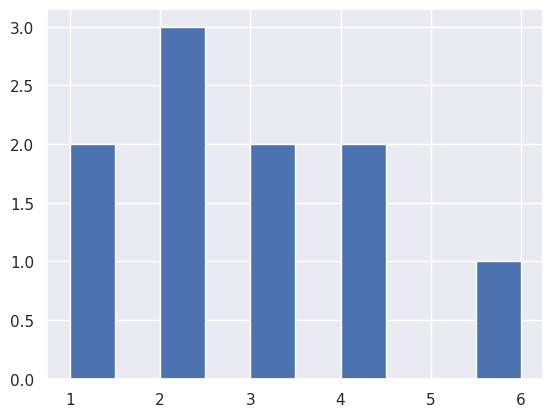

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Pequeño ejemplo de matplotlib
plt.hist([1,2,3,6,4,1,2,3,2,4]);

In [37]:
from docx import Document
from docx.shared import Cm

In [38]:

class Reporte():
    '''Esta clase va a generar un reporte para un Sujeto a partir de un Experimento'''
    def __init__(self, sujeto: Sujeto, experimento: Experimento, img_path = 'tmp.png'):
        self.suj = sujeto
        self.exp = experimento
        self.img_path = img_path ## ruta de imagen

    def crear_graficos(self):  ## funcion crear graficos
        '''Genera un gráfico de lineas y un histograma para
        los datos de los experimentos'''
        fig, ax = plt.subplots(1,2, figsize=(11,4))
        ax[0].plot(self.exp.datos)
        ax[0].set_ylabel('Error (ms)')
        ax[0].set_xlabel('Trials')
        sns.distplot(self.exp.datos, ax=ax[1])
        ax[1].set_ylabel('Frequencia')
        ax[1].set_xlabel('Error (ms)')
        return ax

    def generar_reporte(self):  ## automatizar documentos con python
        '''Función que genera un documento de Word en base a los datos
        de Sujeto y Experimento. Ver más en:

        https://python-docx.readthedocs.io/en/latest/
        '''
        # Instanciamos un Documento
        documento = Document()

        # Agregamos un Titulo
        documento.add_heading(f'Informe de Resultados', 0) ## titulo 0 jerarquia de titulo
        # Info del sujeto
        p = documento.add_paragraph(f'Sujeto ID: ')
        p.add_run(f'{self.suj.id}').bold = True  ## parrafo

        # Agregamos una lista de items iterando
        # el diccionario de info del Sujeto
        for k, v in self.suj.info.items():
            documento.add_paragraph(f'{k}= {v}',
                                   style='List Bullet')  ## estilo

        # Agregamos resultados, hay distintos estilos disponibles
        p = documento.add_paragraph(f'Resultados de {self.exp.nombre}',
                                   style='Intense Quote')

        # COMPLETAR
        # iterar los resultados en self.suj.resultados
        # agregando otra lista de items
        for k, v in self.suj.resultados.items(): ## resultados
            documento.add_paragraph(f'{k}= {v}',
                                   style='List Bullet')

        # Agregamos los gráficos
        ax = self.crear_graficos()
        plt.savefig(self.img_path) # usamos esta ruta provisorialmente
        plt.close() # para no mostrar el plot y solo guardarlo
        documento.add_picture(self.img_path, width=Cm(14))

        # Guardamos el archivo docx
        fp = f'reporte_{self.suj.id}.docx'
        documento.save(fp)
        return fp

##Este código define una clase Reporte que genera un informe en formato Word (.docx) con los resultados de un experimento realizado por un sujeto. Utiliza la librería python-docx para crear el documento y matplotlib (con seaborn) para generar gráficos.

Análisis del código:

1. class Reporte():

Define la clase Reporte.
'''Documentación...''': Explica el propósito de la clase.
2. def __init__(self, sujeto: Sujeto, experimento: Experimento, img_path = 'tmp.png'):

Constructor de la clase.
sujeto: Sujeto: Objeto de la clase Sujeto que representa al sujeto del experimento.
experimento: Experimento: Objeto de la clase Experimento con los datos del experimento.
img_path = 'tmp.png': Ruta por defecto para guardar la imagen de los gráficos.
self.suj = sujeto: Guarda el objeto Sujeto en el atributo suj.
self.exp = experimento: Guarda el objeto Experimento en el atributo exp.
self.img_path = img_path: Guarda la ruta de la imagen en el atributo img_path.
3. def crear_graficos(self):

Crea dos gráficos: un gráfico de líneas y un histograma.
fig, ax = plt.subplots(1,2, figsize=(11,4)): Crea una figura con dos subplots (uno al lado del otro) con un tamaño de 11x4 pulgadas.
ax[0].plot(self.exp.datos): Crea un gráfico de líneas con los datos del experimento en el primer subplot.
ax[0].set_ylabel('Error (ms)'): Etiqueta el eje Y del primer subplot como "Error (ms)".
ax[0].set_xlabel('Trials'): Etiqueta el eje X del primer subplot como "Trials".
sns.distplot(self.exp.datos, ax=ax[1]): Crea un histograma con los datos del experimento en el segundo subplot.
ax[1].set_ylabel('Frequencia'): Etiqueta el eje Y del segundo subplot como "Frequencia".
ax[1].set_xlabel('Error (ms)'): Etiqueta el eje X del segundo subplot como "Error (ms)".
return ax: Retorna los ejes de los subplots.
4. def generar_reporte(self):

Genera el reporte en formato Word (.docx).
documento = Document(): Crea un nuevo documento de Word.
documento.add_heading(f'Informe de Resultados', 0): Agrega un título al documento.
p = documento.add_paragraph(f'Sujeto ID: '): Agrega un párrafo con el texto "Sujeto ID: ".
p.add_run(f'{self.suj.id}').bold = True: Agrega el ID del sujeto en negrita al párrafo anterior.
for k, v in self.suj.info.items():: Itera sobre el diccionario info del sujeto.
documento.add_paragraph(f'{k}= {v}', style='List Bullet'): Agrega cada elemento del diccionario como una viñeta en el documento.
p = documento.add_paragraph(f'Resultados de {self.exp.nombre}', style='Intense Quote'): Agrega un párrafo con los resultados del experimento en un estilo de cita.
for k, v in self.suj.resultados.items():: Itera sobre el diccionario resultados del sujeto.
documento.add_paragraph(f'{k}= {v}', style='List Bullet'): Agrega cada resultado como una viñeta en el documento.
ax = self.crear_graficos(): Llama al método crear_graficos para generar los gráficos.
plt.savefig(self.img_path): Guarda los gráficos en un archivo de imagen.
plt.close(): Cierra la figura para evitar que se muestre en pantalla.
documento.add_picture(self.img_path, width=Cm(14)): Agrega la imagen de los gráficos al documento.
fp = f'reporte_{self.suj.id}.docx': Crea la ruta del archivo del reporte.
documento.save(fp): Guarda el documento en la ruta especificada.
return fp: Retorna la ruta del archivo del reporte.
En resumen, la clase Reporte:

Genera un informe en Word con los resultados de un experimento.
Incluye información del sujeto y del experimento.
Genera gráficos de líneas e histogramas con los datos del experimento.
Guarda el reporte en un archivo .docx.

In [39]:
# Instanciamos
rep = Reporte(sujeto, tr)

In [40]:
# Generar reporte
fp = rep.generar_reporte()

<ipython-input-38-ffb8ace7f82d>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.exp.datos, ax=ax[1])


In [41]:
# Para descargar el doc en Colab
from google.colab import files

files.download(fp)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>